In [110]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [2]:
df = pd.read_csv('dados/dados.csv')
df.shape[0]

76840

In [3]:
#Amostragem aleatoria simples
amostra = df.sample(n=100,random_state=101)

In [4]:
amostra.shape[0]

100

In [5]:
amostra.Renda.mean()

2150.85

In [7]:
df.Sexo.value_counts(normalize=True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [8]:
amostra.Sexo.value_counts(normalize= True)

0    0.69
1    0.31
Name: Sexo, dtype: float64

In [9]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [11]:
df.Cor.value_counts(normalize=True)

8    0.467530
2    0.414042
4    0.109201
0    0.004646
6    0.004581
Name: Cor, dtype: float64

In [12]:
amostra.Cor.value_counts(normalize=True)

2    0.54
8    0.37
4    0.07
6    0.01
0    0.01
Name: Cor, dtype: float64

In [103]:
#teorema do limite central
n = 30
total_de_amostras = 500
amostras = pd.DataFrame()

for i in range(total_de_amostras):
    _ = df.Idade.sample(n)
    _.index = range(n)
    amostras['Amostra' + str(i)] = _

amostras

,Amostra0,Amostra1,Amostra2,Amostra3,Amostra4,Amostra5,Amostra6,Amostra7,Amostra8,Amostra9,...,Amostra490,Amostra491,Amostra492,Amostra493,Amostra494,Amostra495,Amostra496,Amostra497,Amostra498,Amostra499
0,23,18,42,68,46,59,60,30,62,51,...,35,45,46,34,67,38,39,57,40,33
1,39,29,39,33,45,53,57,38,47,62,...,57,38,33,39,53,36,53,68,25,50
2,36,58,51,45,51,48,65,56,55,35,...,38,33,32,68,36,43,47,34,44,51
3,36,69,40,50,45,40,37,49,49,44,...,55,54,48,37,66,37,51,26,56,30
4,48,32,55,51,56,45,34,34,44,52,...,49,57,40,59,54,54,35,20,41,27
5,72,44,64,41,54,61,33,37,39,66,...,38,63,57,48,53,45,59,36,59,27
6,18,55,32,37,40,57,35,22,48,25,...,70,41,55,73,32,38,42,63,27,39
7,61,54,50,24,50,38,31,54,51,49,...,29,46,21,50,47,28,61,34,65,40
8,54,43,52,68,31,36,43,54,40,53,...,26,25,29,30,40,34,49,35,34,39
9,68,32,24,54,58,55,61,32,56,54,...,54,34,35,49,38,36,62,21,30,49


In [104]:
amostras.mean()

Amostra0      42.033333
Amostra1      44.266667
Amostra2      44.133333
Amostra3      45.800000
Amostra4      44.000000
                ...    
Amostra495    44.233333
Amostra496    44.133333
Amostra497    41.066667
Amostra498    46.766667
Amostra499    40.100000
Length: 500, dtype: float64

<AxesSubplot:>

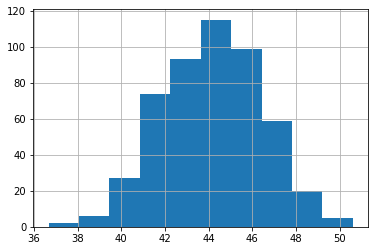

In [105]:
amostras.mean().hist()

In [106]:
#média da população
df.Idade.mean()

44.07142113482561

In [107]:
#média da média das amostras
amostras.mean().mean()

44.15266666666666

In [108]:
#desvio padrão da média das amostras
amostras.mean().std()

2.261753388438616

In [109]:
#desvio padrão da população divido pela raiz do número de amostras
df.Idade.std()/np.sqrt(n)

2.2786323649345084

## Nível de confiança e de significância

In [113]:
#exemplo sacos de arroz
desvpop = 150
n = 20
peso_medio = 5050
alfa = 0.05
beta = 0.95
area_confianca = 0.975
z = norm.ppf(area_confianca)
z

1.959963984540054

In [125]:
#solucao 1
e = z*(desvpop/np.sqrt(n)) 
intervalo = (peso_medio - e, peso_medio + e)
intervalo            
print(f'O intervalo de confinça do peso médio do saco de arroz é {round(intervalo[0],2)} g a {round(intervalo[1],2)} g')

O intervalo de confinça do peso médio do saco de arroz é 4984.26 g a 5115.74 g


In [126]:
#solucao 2
norm.interval(0.95,loc = peso_medio, scale=e)

(4921.153554162426, 5178.846445837574)

In [130]:
#exemplo fast-food
n=50
desvpop=6
alfa = 0.05
area_beta = 1 - (alfa/2)
z= norm.ppf(area_beta)
erro = z*(desvpop/(np.sqrt(n)))
print(f'A margem de erro é {round(erro,2)}')

A margem de erro é 1.66


In [133]:
#exemplo 2
n = 1976
desvpad = 11
media = 28
alfa = 0.1
area_beta = 1-(alfa/2)
z= norm.ppf(area_beta)
erro = z*(desvpad/(np.sqrt(n)))
intervalo = (media-erro, media+erro)
print(f'O intervalo de confiança é de {round(intervalo[0],2)} a {round(intervalo[1],2)}')

O intervalo de confiança é de 27.59 a 28.41
